## libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data shape

In [3]:
train.shape

(891, 12)

### Data Info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Count of missing values in a column

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleanning

In [6]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [7]:
train.groupby(['Pclass']).mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare,relatives,not_alone
Pclass,,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.773148,0.504630
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.782609,0.565217
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,1.008147,0.659878


In [8]:
def age_nul(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        if Pclass == 2:
            return 29
        if Pclass == 3:
            return 25
    else:
        return Age

In [9]:
train['Age'] = train[['Age','Pclass']].apply(age_nul, axis =1)

In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
relatives        0
not_alone        0
dtype: int64

#### scince we have too many messing values in the Cabin column. we will drop the column.

In [11]:
train.drop('Cabin', axis = 1, inplace = True)
test.drop('Cabin', axis = 1, inplace = True)

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
relatives      0
not_alone      0
dtype: int64

In [13]:
common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int32  
dtypes: float64(2), int32(1), int64(6), object(4)
memory usage: 87.1+ KB


In [16]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [17]:
data = [train, test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7,S,1,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71,C,1,0,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7,S,0,1,2
3,4,1,1,female,35.0,1,0,113803,53,S,1,0,3
4,5,0,3,male,35.0,0,0,373450,8,S,0,1,1


In [19]:
gender = {'male':0, 'female':1}
data = [train, test]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

In [20]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

In [21]:
leter = {'S':0, 'C':1 , 'Q':2}
data = [train, test]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(leter)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    int32  
 8   Embarked     891 non-null    int64  
 9   relatives    891 non-null    int64  
 10  not_alone    891 non-null    int32  
 11  Title        891 non-null    int64  
dtypes: float64(1), int32(2), int64(9)
memory usage: 76.7 KB


In [23]:
for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [24]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,1,0,3,0,2,1,0,7,0,1,0,1
1,2,1,1,1,5,1,0,71,1,1,0,3
2,3,1,3,1,3,0,0,7,0,0,1,2
3,4,1,1,1,5,1,0,53,0,1,0,3
4,5,0,3,0,5,0,0,8,0,0,1,1
5,6,0,3,0,3,0,0,8,2,0,1,1
6,7,0,1,0,6,0,0,51,0,0,1,1
7,8,0,3,0,0,3,1,21,0,4,0,4
8,9,1,3,1,3,0,2,11,0,2,0,3
9,10,1,2,1,1,1,0,30,1,1,0,3


In [25]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### creating new features

In [26]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [27]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [28]:
train.drop('PassengerId', axis = 1, inplace = True)

In [29]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,5,1
2,1,3,1,3,0,0,0,0,0,1,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,5,1
4,0,3,0,5,0,0,1,0,0,1,1,15,1


In [30]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,892,3,0,5,0,0,0,2,0,1,1,15,0
1,893,3,1,6,1,0,0,0,1,0,3,18,0
2,894,2,0,6,0,0,1,2,0,1,1,12,1
3,895,3,0,3,0,0,1,0,0,1,1,9,1
4,896,3,1,2,1,1,1,0,2,0,3,6,0


### All featuresof train data

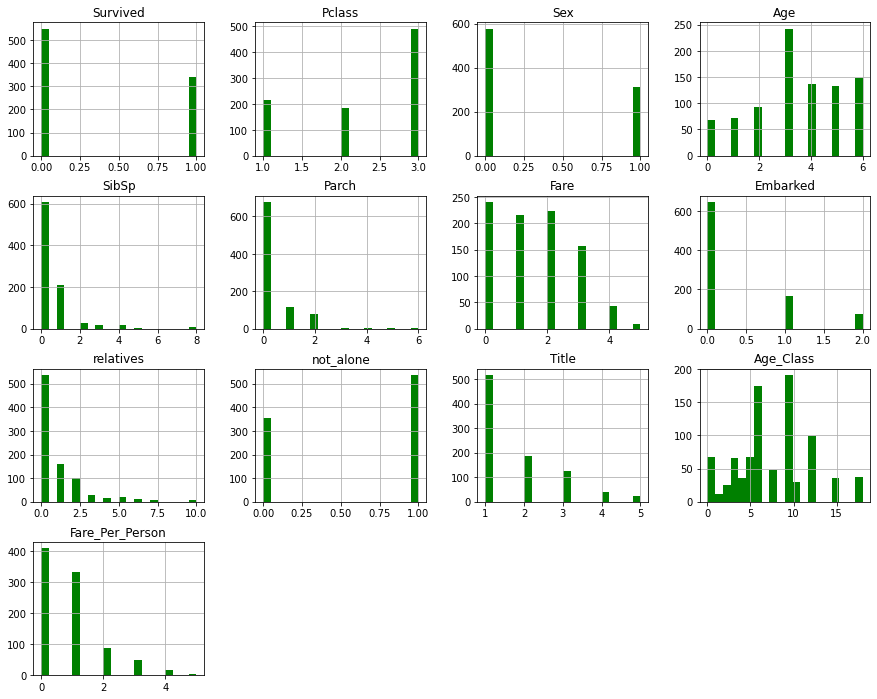

In [31]:
train.hist(figsize=(15,12),bins = 20, color="green")
plt.title("Features Distribution")
plt.show()

## heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

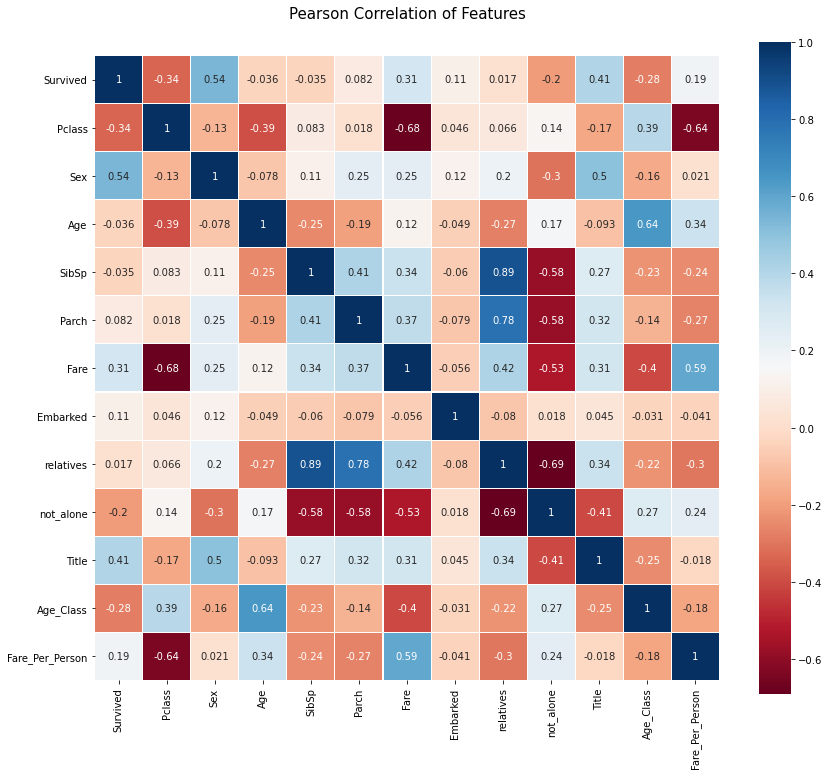

In [32]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

## Spliting

In [33]:
X_train = train.drop(['Survived'], axis=1)
Y_train = train['Survived']
X_test  = test.drop(['PassengerId'],axis=1).copy()

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           891 non-null    int64
 1   Sex              891 non-null    int64
 2   Age              891 non-null    int32
 3   SibSp            891 non-null    int64
 4   Parch            891 non-null    int64
 5   Fare             891 non-null    int32
 6   Embarked         891 non-null    int64
 7   relatives        891 non-null    int64
 8   not_alone        891 non-null    int32
 9   Title            891 non-null    int64
 10  Age_Class        891 non-null    int64
 11  Fare_Per_Person  891 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 69.7 KB


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Pclass           418 non-null    int64
 1   Sex              418 non-null    int64
 2   Age              418 non-null    int32
 3   SibSp            418 non-null    int64
 4   Parch            418 non-null    int64
 5   Fare             418 non-null    int32
 6   Embarked         418 non-null    int64
 7   relatives        418 non-null    int64
 8   not_alone        418 non-null    int32
 9   Title            418 non-null    int64
 10  Age_Class        418 non-null    int64
 11  Fare_Per_Person  418 non-null    int32
dtypes: int32(4), int64(8)
memory usage: 32.8 KB


### Stochastic Gradient Descent

In [36]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)

pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

### Random Forest

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

### Logistic Regression

In [38]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

### K Nearest Neighbor

In [39]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

### Gaussian Naive Bayes

In [40]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train) 
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

### Perceptron

In [41]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\mosae\New folder\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Linear Support Vector Machine

In [42]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\mosae\New folder\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Decision Tree

In [43]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

### Which is the best Model ?

In [44]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
90.91,Random Forest
90.91,Decision Tree
86.53,KNN
82.15,Logistic Regression
81.59,Support Vector Machines
80.70,Stochastic Gradient Decent
78.68,Perceptron
78.56,Naive Bayes


In [45]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.73333333 0.86516854 0.73033708 0.85393258 0.87640449 0.86516854
 0.82022472 0.78651685 0.85393258 0.79775281]
Mean: 0.8182771535580524
Standard Deviation: 0.05167366745347589


Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

### Feature Importance

In [46]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.219
Sex,0.180
Age_Class,0.113
Pclass,0.088
Fare,0.078
Age,0.071
relatives,0.065
Embarked,0.055
Fare_Per_Person,0.047


<AxesSubplot:xlabel='feature'>

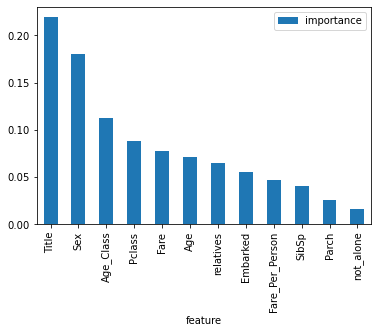

In [47]:
importances.plot.bar()

From the Feature importance we see that Pach and Not_alone are the lowest

In [48]:
train  = train.drop("not_alone", axis=1)
test  = test.drop("not_alone", axis=1)

train  = train.drop("Parch", axis=1)
test  = test.drop("Parch", axis=1)

In [49]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.91 %


In [50]:
train  = train.drop("SibSp", axis=1)
test  = test.drop("SibSp", axis=1)

In [51]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

90.91 %


In [52]:
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

In [53]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9609577221742882


In [56]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
